In [1]:
# ---------------------------
# 1️ Import required libraries
# ---------------------------
import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import random
import os
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from IPython.display import display, HTML


In [2]:

# ---------------------------
# 2 Discover DATASET
# ---------------------------

def load_and_explore_data(file_path):
    """
    Load a CSV dataset, display basic information, preview the data, 
    and summarize missing values and data types.
    
    """
    # Load CSV file
    df = pd.read_csv(file_path)

    # Display heading
    display(HTML("<p style='font-size:20px; font-weight:bold; color:green;'>📥 Dataset Loaded Successfully</p>"))

    # Display shape
    print(f"🔢 Shape of dataset: {df.shape[0]} rows × {df.shape[1]} columns\n")

    # Display column names and data types
    print("📋 Column Data Types:")
    print(df.dtypes)
    print("\n")

    # Display first 10 rows
    print("🔍 Sample of the first 10 rows:")
    print(df.head(10))
    print("\n")

    # Display number of missing values per column
    print("❗ Missing Values Summary:")
    print(df.isnull().sum())
    print("\n")

    # Display basic statistics
    print("📊 Statistical Summary (Numeric Columns):")
    print(df.describe(include='number'))
    print("\n")

    # Display value counts for categorical columns
    print("🔠 Unique value counts (Categorical Columns):")
    for col in df.select_dtypes(include='object').columns:
        print(f"\n📌 Column: {col}")
        print(df[col].value_counts(dropna=False))

    return df


# ---------------------------
# MAIN EXECUTION
# ---------------------------

# Specify file path
file_path = r"C:\Users\linke\OneDrive - AL-Hussien bin Abdullah Technical University\Desktop\Current research\Data Analytics portfolio\raw_selling_price_data1_1.csv"

# Load and explore the dataset
df = load_and_explore_data(file_path)


🔢 Shape of dataset: 676 rows × 3 columns

📋 Column Data Types:
Date             object
Vegetable        object
SellingPrice    float64
dtype: object


🔍 Sample of the first 10 rows:
        Date   Vegetable  SellingPrice
0   1/1/2024   Artichoke         500.0
1   1/8/2024   Artichoke         500.0
2  1/15/2024   artichoke         500.0
3  1/22/2024   Artichoke         500.0
4  1/29/2024   Artichoke         500.0
5   2/5/2024   Artichoke         500.0
6  2/12/2024   Artichoke         500.0
7  2/19/2024  Artichoke.         500.0
8  26-2-2024   Artichoke         500.0
9   3/4/2024   Artichoke           NaN


❗ Missing Values Summary:
Date             0
Vegetable        0
SellingPrice    13
dtype: int64


📊 Statistical Summary (Numeric Columns):
       SellingPrice
count    663.000000
mean     109.268477
std      175.589289
min        4.000000
25%       17.000000
50%       30.000000
75%       80.000000
max     1300.000000


🔠 Unique value counts (Categorical Columns):

📌 Column: Date
Date


In [3]:

# -----------------------------------------------------
# 3 Data Cleaning – Correction and Ensuring Consistency
# -----------------------------------------------------

def display_unique_vegetables(title: str, veg_list):
    """
    Display a formatted HTML message and print the list of unique vegetable names.
    """
    
    display(HTML(f"<p style='font-size:20px; font-weight:bold; color:green;'>\n{title}"))
    print(veg_list)


def correct_vegetable_names(df):
    """
    Apply manual corrections to inconsistent or incorrect entries in the 'Vegetable' column.
    
    """
    # Dictionary mapping incorrect names to their corrected forms
    corrections = {
        'artichoke': 'Artichoke',
        'Artichoke ': 'Artichoke',
        'Artichoke.': 'Artichoke',
        'Spinich': 'Spinach',
        'Jute': 'Jute mallow',
        'jute Mallow': 'Jute mallow'
    }
    
    # Display unique values before correction
    before = df['Vegetable'].unique()
    display_unique_vegetables("😞 Vegetables (Before correction):", before)
    
    # Apply corrections
    df['Vegetable'] = df['Vegetable'].replace(corrections)
    
    # Display unique values after correction
    after = df['Vegetable'].unique()
    display_unique_vegetables("🚩 Unique Vegetables (after correction):", after)
    
    return df


def standardize_and_check_dates(df):
    """
    Convert the 'Date' column to datetime format and identify any invalid or missing values.
    """
    # Convert 'Date' column to datetime, coercing invalid formats to NaT
    df["Date"] = pd.to_datetime(df["Date"], errors='coerce')
    
    # Identify and display records with invalid or missing dates
    invalid_dates = df[df["Date"].isna()]
    display(HTML("<p style='font-size:20px; font-weight:bold; color:green;'>\n 😞 Records with invalid or missing Date values:"))
    print(invalid_dates)
    print("\n")
    
    return df


# ---------------------------
# MAIN EXECUTION
# ---------------------------

# Apply vegetable name corrections
df = correct_vegetable_names(df)

# Standardize date format and identify issues
df = standardize_and_check_dates(df)


['Artichoke' 'artichoke' 'Artichoke.' 'Artichoke ' 'Arugula' 'Cabbage'
 'Celery' 'Jute mallow' 'jute Mallow' 'Kale' 'Leek' 'Lettuce' 'Mint'
 'Parsley' 'Red cabbage' 'Spinach' 'Spinich' 'Swiss chard']


['Artichoke' 'Arugula' 'Cabbage' 'Celery' 'Jute mallow' 'Kale' 'Leek'
 'Lettuce' 'Mint' 'Parsley' 'Red cabbage' 'Spinach' 'Swiss chard']


    Date  Vegetable  SellingPrice
8    NaT  Artichoke         500.0
101  NaT    Arugula          12.0




Date             2
Vegetable        0
SellingPrice    13
dtype: int64


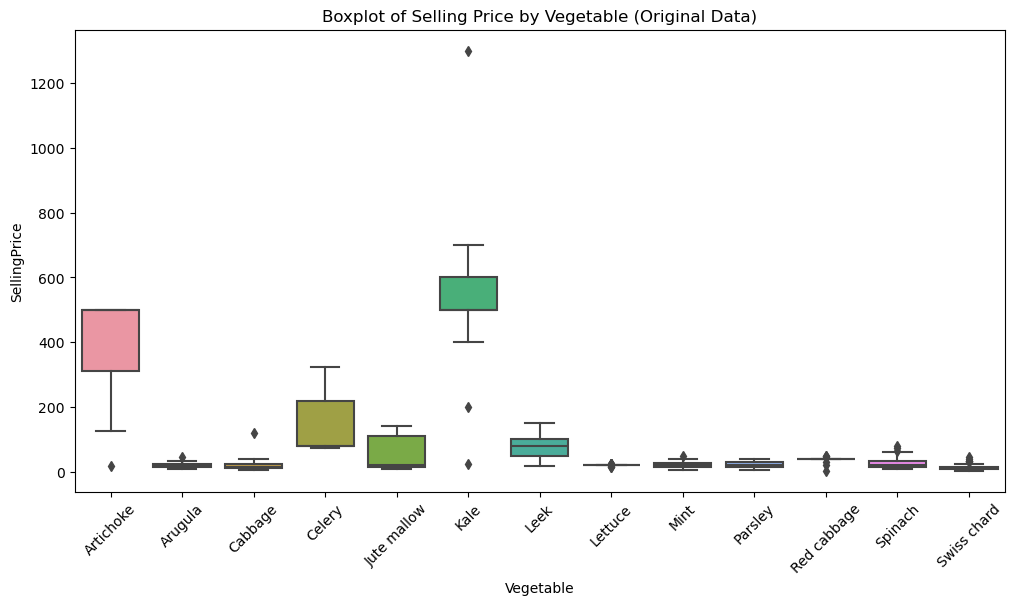

         Date  Vegetable  SellingPrice
25 2024-06-24  Artichoke          17.0


C:\Users\linke\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


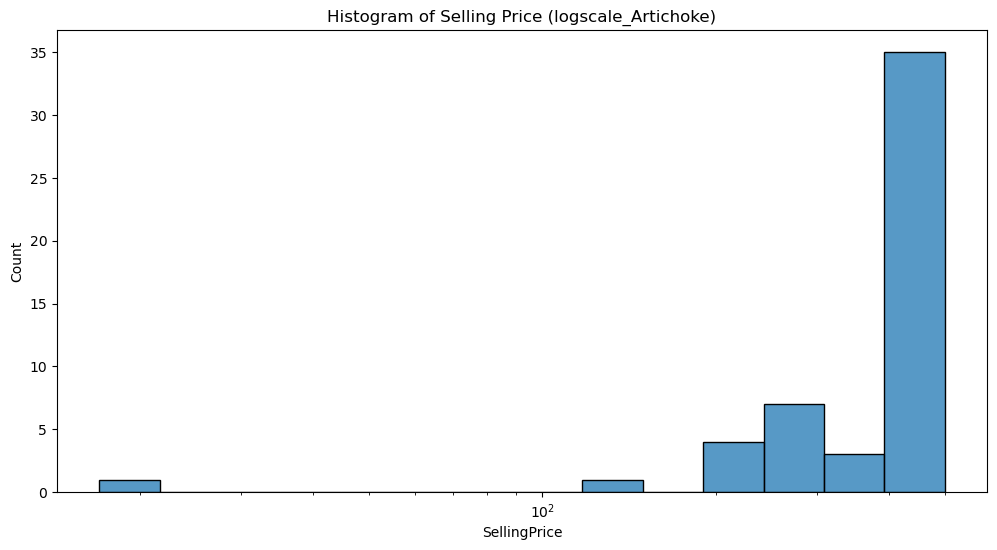

          Date Vegetable  SellingPrice
115 2024-03-18   Cabbage         120.0


C:\Users\linke\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


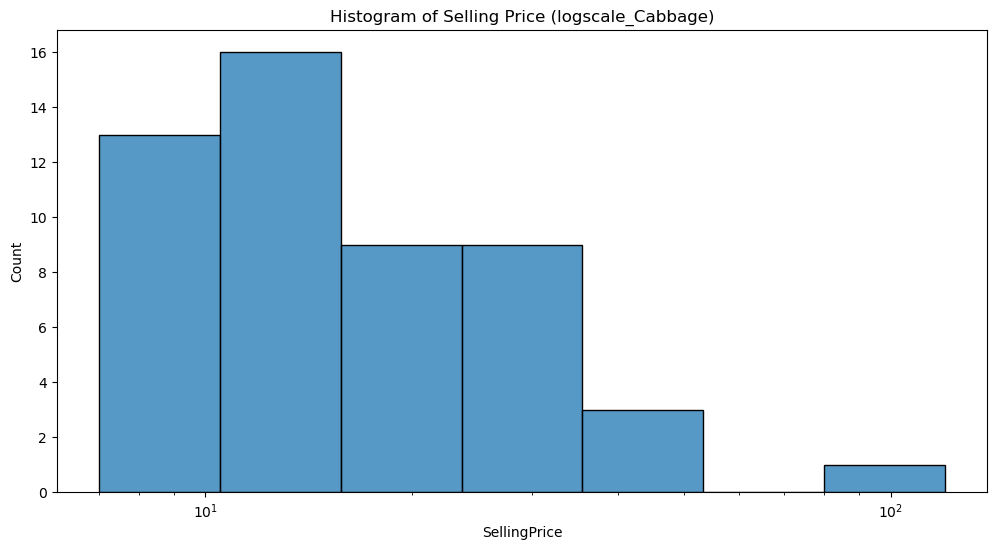

          Date Vegetable  SellingPrice
276 2024-04-22      Kale        1300.0
290 2024-07-29      Kale          25.0
310 2024-12-16      Kale         200.0


C:\Users\linke\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


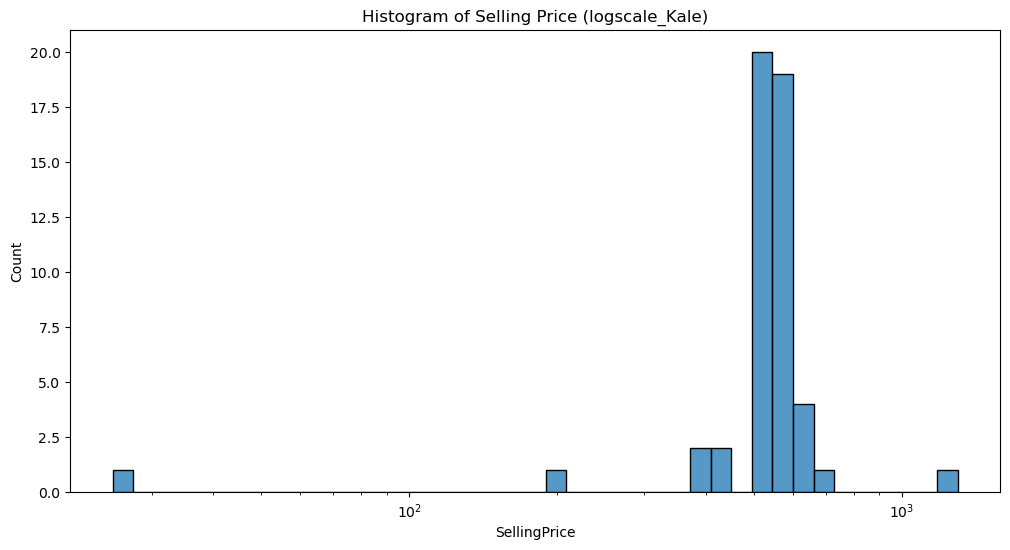

    Vegetable  SellingPrice
25  Artichoke          17.0




    Vegetable  SellingPrice
115   Cabbage         120.0




    Vegetable  SellingPrice
276      Kale        1300.0
290      Kale          25.0
310      Kale         200.0




In [4]:
# ---------------------------
# 4 Outlier Detection and Treatment
# ---------------------------

# Step 1: Check missing values
display(HTML("<p style='font-size:20px; font-weight:bold; color:green;'>\n ⚠️ Missing Values:\n"))
print(df.isnull().sum())

# Step 2: Plot SellingPrice column to spot outliers

#Note: 
# 1- Boxplot outliers are a statistical warning, not a final verdict. Histograms complement boxplots but are not foolproof for outlier detection.

# 2- Always prioritize domain context over automated statistical rules. As noted in Modern Statistics for Modern Biology (Holmes & Huber, 2019):

#                  "Outliers are not ‘bad data’ to be blindly removed; they are invitations to investigate further."

plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Vegetable', y='SellingPrice')
plt.xticks(rotation=45)
plt.title("Boxplot of Selling Price by Vegetable (Original Data)")
plt.show()

# Step 3: Filter and inspect the "outlier" values: calculate Q1, Q3, and IQR

def detect_and_display_outliers(df, vegetable):
    """
    Detect and display outliers in 'SellingPrice' for a specific vegetable type using IQR method.
    """
    veg_data = df[df['Vegetable'] == vegetable].dropna(subset=['SellingPrice'])
    Q1 = veg_data['SellingPrice'].quantile(0.25)
    Q3 = veg_data['SellingPrice'].quantile(0.75)
    IQR = Q3 - Q1
    outliers = veg_data[(veg_data['SellingPrice'] < (Q1 - 1.5 * IQR)) | (veg_data['SellingPrice'] > (Q3 + 1.5 * IQR))]

    display(HTML(f"<p style='font-size:20px; font-weight:bold; color:green;'>🔍 Possible Outliers for {vegetable}</p>"))
    print(outliers)

def plot_log_histogram(df, vegetable):
    """
    Plot a histogram of 'SellingPrice' in log scale for a specific vegetable type.
    """
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df[df['Vegetable'] == vegetable], x='SellingPrice', log_scale=True)
    plt.title(f"Histogram of Selling Price (logscale_{vegetable})")
    plt.show()

# 🥬 Run for each vegetable
vegetables = ['Artichoke', 'Cabbage', 'Kale']
for veg in vegetables:
    detect_and_display_outliers(df, veg)
    plot_log_histogram(df, veg)

## Checking the boxplot and the histograms and taking into consideration the type of vegetable 
#and the fact that the price is generally having a skewed distribution, 


# Define the outlier condition mask_Artichoke
outlier_mask = (df['Vegetable'] == 'Artichoke') & (df['SellingPrice'] <20)

# Get the affected rows BEFORE replacement
affected_rows = df[outlier_mask].copy()  # Use .copy() to avoid SettingWithCopyWarning

# Replace outliers with NaN
df.loc[outlier_mask, 'SellingPrice'] = np.nan

# Display results
if not affected_rows.empty:
    display(HTML("<p style='font-size:20px; font-weight:bold; color:green;'> ❗Outliers replaced with NaN for Artichoke (SellingPrice < 20):"))
    print(affected_rows[['Vegetable', 'SellingPrice']])  # Show relevant columns
    print("\n")
else:
 display(HTML("<p style='font-size:20px; font-weight:bold; color:green;'>\n 👍No Artichoke records with SellingPrice < 20 found."))

# Define the outlier condition mask_Cabbage
outlier_mask = (df['Vegetable'] == 'Cabbage') & (df['SellingPrice'] >100)

# Get the affected rows BEFORE replacement
affected_rows = df[outlier_mask].copy()  # Use .copy() to avoid SettingWithCopyWarning

# Replace outliers with NaN
df.loc[outlier_mask, 'SellingPrice'] = np.nan

# Display results
if not affected_rows.empty:
    display(HTML("<p style='font-size:20px; font-weight:bold; color:green;'> ❗Outliers replaced with NaN for Cabbage (SellingPrice > 100):"))
    print(affected_rows[['Vegetable', 'SellingPrice']])  # Show relevant columns
    print("\n")
else:
 display(HTML("<p style='font-size:20px; font-weight:bold; color:green;'>\n 👍No Cabbage records with SellingPrice > 100 found."))

# Define the outlier condition mask_Kale
outlier_mask = (df['Vegetable'] == 'Kale') & ((df['SellingPrice'] <400) | (df['SellingPrice'] >800))

# Get the affected rows BEFORE replacement
affected_rows = df[outlier_mask].copy()  # Use .copy() to avoid SettingWithCopyWarning

# Replace outliers with NaN
df.loc[outlier_mask, 'SellingPrice'] = np.nan

# Display results
if not affected_rows.empty:
    display(HTML("<p style='font-size:20px; font-weight:bold; color:green;'> ❗Outliers replaced with NaN for Kale (SellingPrice <400 or > 800):"))
    print(affected_rows[['Vegetable', 'SellingPrice']])  # Show relevant columns
    print("\n")
else:
 display(HTML("<p style='font-size:20px; font-weight:bold; color:green;'>\n 👍No Kale records with SellingPrice >= 140 found."))

Date             2
Vegetable        0
SellingPrice    18
dtype: int64


C:\Users\linke\AppData\Local\Temp\ipykernel_23564\182057608.py:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Date"] = df["Date"].fillna(method='ffill')
C:\Users\linke\AppData\Local\Temp\ipykernel_23564\182057608.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Date"] = df["Date"].fillna(method='bfill')


Date             0
Vegetable        0
SellingPrice    18
dtype: int64
✅ Imputed missing SellingPrice for Artichoke (2 records)
✅ Imputed missing SellingPrice for Arugula (1 records)
✅ Imputed missing SellingPrice for Cabbage (2 records)
✅ Imputed missing SellingPrice for Celery (2 records)
✅ No missing values for Jute mallow. Skipping imputation.
✅ Imputed missing SellingPrice for Kale (4 records)
✅ Imputed missing SellingPrice for Leek (1 records)
✅ Imputed missing SellingPrice for Lettuce (1 records)
✅ Imputed missing SellingPrice for Mint (1 records)
✅ Imputed missing SellingPrice for Parsley (3 records)
✅ Imputed missing SellingPrice for Red cabbage (1 records)
✅ No missing values for Spinach. Skipping imputation.
✅ No missing values for Swiss chard. Skipping imputation.


,Vegetable,Date,SellingPrice
9,Artichoke,2024-03-04,384
25,Artichoke,2024-06-24,423
90,Arugula,2024-09-23,19
115,Cabbage,2024-03-18,18
141,Cabbage,2024-09-16,17
177,Celery,2024-05-27,137
202,Celery,2024-11-18,198
276,Kale,2024-04-22,537
281,Kale,2024-05-27,542
290,Kale,2024-07-29,549


Date            0
Vegetable       0
SellingPrice    0
dtype: int64


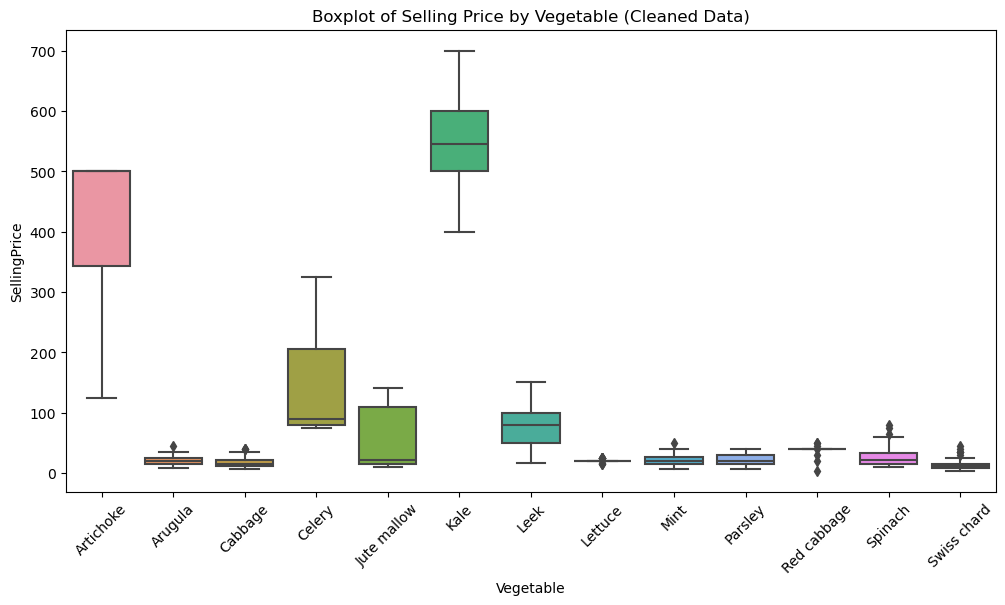

C:\Users\linke\OneDrive - AL-Hussien bin Abdullah Technical University\Desktop\Current research\Data Analytics portfolio\cleaned_selling_price_data.csv


In [5]:
# ---------------------------
# 5 Handling Missing Data Through Imputation
# ---------------------------

def display_missing(df, title):
    """Display missing values summary with a title."""
    display(HTML(f"<p style='font-size:20px; font-weight:bold; color:green;'>🔍 {title}</p>"))
    print(df.isnull().sum())

def impute_date_column(df):
    """Impute missing dates using forward then backward fill."""
    df["Date"] = pd.to_datetime(df["Date"], errors='coerce')
    df["Date"] = df["Date"].fillna(method='ffill')
    df["Date"] = df["Date"].fillna(method='bfill')
    return df

def impute_selling_price(df):
    """
    Impute missing 'SellingPrice' using IterativeImputer with BayesianRidge
    for each vegetable. Returns imputed DataFrame and a summary of imputed rows.
    """
    df['DayOfYear'] = df['Date'].dt.dayofyear
    df_imputed = df.copy()
    all_imputed_records = pd.DataFrame()

    for veg in df['Vegetable'].unique():
        veg_data = df_imputed[df_imputed['Vegetable'] == veg].copy()
        missing_indices = veg_data[veg_data['SellingPrice'].isna()].index

        if len(missing_indices) == 0:
            print(f"✅ No missing values for {veg}. Skipping imputation.")
            continue

        X = veg_data[['SellingPrice', 'DayOfYear']]
        imputer = IterativeImputer(estimator=BayesianRidge(), max_iter=10, random_state=0)
        imputed_values = imputer.fit_transform(X)
        imputed_values = imputed_values.round().astype(int)

        veg_data['SellingPrice'] = imputed_values[:, 0]
        df_imputed.loc[veg_data.index, 'SellingPrice'] = veg_data['SellingPrice']

        imputed_records = veg_data.loc[missing_indices, ['Vegetable', 'Date', 'SellingPrice']]
        all_imputed_records = pd.concat([all_imputed_records, imputed_records], axis=0)

        print(f"✅ Imputed missing SellingPrice for {veg} ({len(missing_indices)} records)")

    return df_imputed.drop('DayOfYear', axis=1), all_imputed_records

def save_cleaned_data(df, output_path):
    """Save cleaned DataFrame to CSV and display confirmation."""
    df.to_csv(output_path, index=False)
    display(HTML("<p style='font-size:20px; font-weight:bold; color:green;'>✅ Cleaned data saved to:</p>"))
    print(output_path)

def plot_cleaned_data(df):
    """Visualize SellingPrice distribution by vegetable."""
    plt.figure(figsize=(12,6))
    sns.boxplot(data=df, x='Vegetable', y='SellingPrice')
    plt.xticks(rotation=45)
    plt.title("Boxplot of Selling Price by Vegetable (Cleaned Data)")
    plt.show()


# ---------------------------
# MAIN WORKFLOW
# ---------------------------

# Step 1: Show missing before imputation
display_missing(df, "Missing values before imputation:")

# Step 2: Impute Date column
df = impute_date_column(df)

# Step 3: Show missing after date imputation
display_missing(df, "Missing values after date imputation:")

# Step 4: Impute SellingPrice
df_imputed, all_imputed_records = impute_selling_price(df)

# Step 5: Show imputed records
display(HTML("<p style='font-size:20px; font-weight:bold; color:green;'>😃 Imputed SellingPrice values AFTER imputation (as integers):</p>"))
display(all_imputed_records)

# Step 6: Show missing values after full imputation
display_missing(df_imputed, "After Iterative Imputation:")

# Step 7: Plot cleaned data
plot_cleaned_data(df_imputed)

# Step 8: Save cleaned data
output_folder = r"C:\Users\linke\OneDrive - AL-Hussien bin Abdullah Technical University\Desktop\Current research\Data Analytics portfolio"
cleaned_data_path = os.path.join(output_folder, "cleaned_selling_price_data.csv")
save_cleaned_data(df_imputed, cleaned_data_path)


In [7]:

# ---------------------------
# 6 Prepare and execute SQL queries in SQL Server Management Studio to support Power BI visualizations.
# ---------------------------
def run_query_and_export(query, output_filename, server="SALEEM", database="V_mar_2024"):
    """
    Executes a SQL query and saves the result to a CSV file.

    Parameters:
        query (str): SQL query to execute.
        output_filename (str): Name of the CSV file to save the results.
        server (str): SQL Server name. Default is "SALEEM".
        database (str): SQL Database name. Default is "V_mar_2024".
    """
    try:
        # Establish database connection
        conn_str = f'DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={server};DATABASE={database};Trusted_Connection=yes;'
        conn = pyodbc.connect(conn_str)

        # Execute query
        df = pd.read_sql_query(query, conn)

        # Close connection
        conn.close()

        # Output folder and full file path
        output_folder = r"C:\Users\linke\OneDrive - AL-Hussien bin Abdullah Technical University\Desktop\Current research\Data Analytics portfolio"
        data_path = os.path.join(output_folder, output_filename)

        # Save DataFrame to CSV
        df.to_csv(data_path, index=False)

        # Display confirmation
        display(HTML(f"<p style='font-size:20px; font-weight:bold; color:green;'>✅ {output_filename} saved to:</p>"))
        print(data_path)
        print("\n")

        return df

    except Exception as e:
        print("❌ Error:", e)
        return pd.DataFrame()  # return empty DataFrame on failure


# ---------------------------
# Execute Multiple Queries
# ---------------------------

# 1. Profitability per vegetable
query_profitability = """
SELECT 
    V.Vegetable_Name,
    V.Productivity_per_m2,
    V.Agricultural_Cost_per_kg,
    V.Cultivation_Cost_per_kg,
    (V.Productivity_per_m2 * AVG(S.SellingPrice)*10) AS Expected_Revenue_per_m2,
    (V.Agricultural_Cost_per_kg + V.Cultivation_Cost_per_kg)*V.Productivity_per_m2 AS Total_Cost_per_m2,
    ((V.Productivity_per_m2 * AVG(S.SellingPrice)*10) - (V.Agricultural_Cost_per_kg + V.Cultivation_Cost_per_kg)*V.Productivity_per_m2) AS Expected_Profit_per_m2
FROM Vegetable_Info V
LEFT JOIN Vegetable_Selling S ON V.V_ID = S.V_ID
GROUP BY V.V_ID, V.Vegetable_Name, V.Productivity_per_m2, V.Agricultural_Cost_per_kg, V.Cultivation_Cost_per_kg;
"""
df_profitability = run_query_and_export(query_profitability, "Profitability per vegetable.csv")


# 2. Average selling price per vegetable
query_avg_price = """
SELECT 
    V.Vegetable_Name,
    AVG(S.SellingPrice)*10 AS Avg_SellingPrice,
    MIN(S.SellingPrice)*10 AS Min_SellingPrice,
    MAX(S.SellingPrice)*10 AS Max_SellingPrice
FROM Vegetable_Info V
LEFT JOIN Vegetable_Selling S ON V.V_ID = S.V_ID
GROUP BY V.V_ID, V.Vegetable_Name;
"""
df_avg_price = run_query_and_export(query_avg_price, "Average selling price per vegetable.csv")


# 3. Demand vs productivity per vegetable
query_demand_vs_productivity = """
SELECT 
    V.Vegetable_Name,
    D.Demand_Quantity,
    V.Productivity_per_m2
FROM Vegetable_Info V
LEFT JOIN Demand D ON V.V_ID = D.V_ID;
"""
df_demand_vs_productivity = run_query_and_export(query_demand_vs_productivity, "Demand_vs_productivity_per_vegetable.csv")

# 4. Volume and Maturity
query_volume_and_maturity="""
SELECT 
      Vegetable_Name,
      GREATEST(V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12) AS Max_Volume, 
      Maturity_Days
FROM Vegetable_Info as VegInfo
LEFT JOIN Volume_12Weeks AS Vol ON VOL.V_ID = VegInfo.V_ID;
 """
df_volume_and_maturity = run_query_and_export(query_volume_and_maturity, "Volume_and_Maturity.csv")


C:\Users\linke\AppData\Local\Temp\ipykernel_23564\1723538004.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


C:\Users\linke\OneDrive - AL-Hussien bin Abdullah Technical University\Desktop\Current research\Data Analytics portfolio\Profitability per vegetable.csv




C:\Users\linke\OneDrive - AL-Hussien bin Abdullah Technical University\Desktop\Current research\Data Analytics portfolio\Average selling price per vegetable.csv




C:\Users\linke\OneDrive - AL-Hussien bin Abdullah Technical University\Desktop\Current research\Data Analytics portfolio\Demand_vs_productivity_per_vegetable.csv




C:\Users\linke\OneDrive - AL-Hussien bin Abdullah Technical University\Desktop\Current research\Data Analytics portfolio\Volume_and_Maturity.csv


